In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pandas to Load Data ONLY!

In [2]:
import pandas as pd
data_path = '/content/drive/My Drive/MNIST_CSV/mnist_train.csv'
df = pd.read_csv(data_path, header=None)
# filter class of 3 & 4
tr_data = df[(df.iloc[:, 0] == 3) | (df.iloc[:, 0] == 4)]
y_train, x_train = tr_data.iloc[:, 0], tr_data.iloc[:, 1:]
y_train


# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_train)
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df
y_train = pd.DataFrame(np.array(y_train), columns=['y'])
y_train # df
pca_train = pd.concat([pca_df, y_train], axis=1)
pca_train #df X&y

,PCA1,PCA2,y
0,-547.480275,-437.024344,4
1,552.342641,751.788932,3
2,-860.211189,446.864868,4
3,1016.061766,576.680789,3
4,1333.012502,-857.884775,3
...,...,...,...
11968,118.084971,839.602235,3
11969,-688.864358,274.722441,4
11970,1012.511602,468.056788,3
11971,602.674265,634.442391,3


## Test Data only needs PCA transform

In [3]:
# test data
test_data_path = '/content/drive/My Drive/MNIST_CSV/mnist_test.csv'

# 使用Pandas读取CSV文件, 筛选要的数据
df_test = pd.read_csv(test_data_path, header=None)
# filter 3 & 4
test_data = df_test[(df_test.iloc[:, 0] == 3) | (df_test.iloc[:, 0] == 4)]
test_data
X_test, y_test = test_data.iloc[:,1:], test_data.iloc[:,0].to_numpy()
# pca transform X
pca_test = pca.transform(X_test)
pca_test = pd.DataFrame(pca_test, columns=['PCA1', 'PCA2'])
pca_test

,PCA1,PCA2
0,-789.275431,-437.870857
1,-400.728489,-61.616513
2,483.689492,-695.359502
3,-655.878815,-108.017990
4,-526.303765,-413.752903
...,...,...
1987,-673.876960,483.623803
1988,590.689431,125.254278
1989,-932.387659,408.654236
1990,1292.079849,-252.500490


# Inverse needs SVD to implement

# PCA

# MED & MDD

In [22]:
# MED input are both df type
def med(train, X_test, dim=2):
    # 计算每个类的中心
    X_test = X_test.to_numpy()
    class_centers = {}
    for cls in [3,4]:
        pca_1_mean = np.mean(train.iloc[:,:dim][train["y"] == cls]["PCA1"])
        pca_2_mean = np.mean(train.iloc[:,:dim][train["y"] == cls]["PCA2"])
        class_centers[cls] = np.array([pca_1_mean, pca_2_mean])

    # 对测试数据进行分类
    predictions = []
    for x in X_test:
        distances = {cls: np.linalg.norm(x - center) for cls, center in class_centers.items()}
        predictions.append(min(distances, key=distances.get))
    return class_centers, np.array(predictions)
class_centers, pred = med(pca_train, pca_train.iloc[:,:2])
print("class centers: ", class_centers)

class centers:  {3: array([648.65008809,  33.43752165]), 4: array([-680.73839269,  -35.09165444])}


# Decision Boundary for MED

ValueError: operands could not be broadcast together with shapes (5842,) (6131,) 

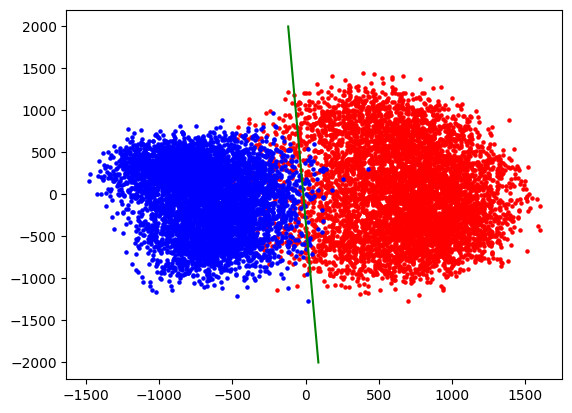

In [5]:
def decision_boundary(x1, y1, x2, y2):
    # 计算中心点
    xc, yc = (x1 + x2) / 2, (y1 + y2) / 2

    # 计算两点所成线段的斜率
    if x2 != x1:
        m = (y2 - y1) / (x2 - x1)
        # 计算垂直线的斜率
        m_perpendicular = -1 / m
        # 生成垂直线的y值
        y_vals = np.linspace(yc - 2000, yc + 2000, 100)
        x_vals = xc + (y_vals - yc) / m_perpendicular
    else:
        # 如果两点所成的线段垂直于x轴
        x_vals = np.linspace(xc - 2000, xc + 2000, 100)
        y_vals = [yc] * 100
    return x_vals, y_vals
x1, y1 = class_centers[3][0], class_centers[3][1]
x2, y2 = class_centers[4][0], class_centers[4][1]
xc, yc = (x1 + x2) / 2, (y1 + y2) / 2
x_vals, y_vals = decision_boundary(x1, y1, x2, y2)

tr_3, tr_4 = pca_train[pca_train["y"]==3], pca_train[pca_train["y"]==4]
cls_3_pca_1, cls_3_pca_2 = tr_3.iloc[:,0].to_numpy(), tr_3.iloc[:,1].to_numpy()
cls_4_pca_1, cls_4_pca_2 = tr_4.iloc[:,0].to_numpy(), tr_4.iloc[:,1].to_numpy()
# 画出原始点
plt.scatter(cls_3_pca_1, cls_3_pca_2, color='red', s=5)
plt.scatter(cls_4_pca_1, cls_4_pca_2, color='blue', s=5)

# 画出中心点
#plt.scatter([xc], [yc], color='yellow')

# 画出垂直线
plt.plot(x_vals, y_vals, color='green')

# 设置图表属性以便更好地展示结果
x1, y1 = cls_3_pca_1, cls_3_pca_2
x2, y2 = cls_4_pca_1, cls_4_pca_2
plt.xlim(min(x1, x2) - 100, max(x1, x2) + 100)
plt.ylim(min(y1, y2), max(y1, y2))
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("MED Classifier Decision Boundary")

plt.show()

# MMD

In [14]:
def eigen_inv(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    eigenvalues_inv = np.diag(1 / eigenvalues)
    matrix_inv = eigenvectors @ eigenvalues_inv @ eigenvectors.T

    return matrix_inv


cls_3 = pca_train.iloc[:,:2][pca_train["y"] == 3]
cls_4 = pca_train.iloc[:,:2][pca_train["y"] == 4]
mean_3 = np.array([np.mean(cls_3["PCA1"]), np.mean(cls_3["PCA2"])])
mean_4 = np.array([np.mean(cls_4["PCA1"]), np.mean(cls_4["PCA2"])])
cov_3 = cls_3.cov().values
cov_4 = cls_4.cov().values
cov_inv_3 = eigen_inv(cov_3)
cov_inv_4 = eigen_inv(cov_4)
# cov_inv_3 = np.cov(inv_3)
# cov_inv_4 = np.cov(inv_4)

# train is df
def mmd(train, X_test):
    X_test = X_test.to_numpy()
    # all the data are after pca

    # cov_inv_3 = np.linalg.inv(cls_3.cov().values)
    # cov_inv_4 = np.linalg.inv(cls_4.cov().values)

    # decomposition of the dist func
    cov_inv_sub = cov_inv_3 - cov_inv_4
    linear = 2*(np.dot(mean_4.T, cov_inv_4) - np.dot(mean_3.T, cov_inv_3))
    constant = np.dot(np.dot(mean_3.T, cov_inv_3), mean_3) - np.dot(np.dot(mean_4.T, cov_inv_4), mean_4)
    predictions = []
    for x in X_test:
        quad = np.dot(np.dot(x.T, cov_inv_sub), x)
        line = np.dot(linear, x)
        dist_func = quad + line + constant
        if dist_func < 0:
            predictions.append(3)
        else:
            predictions.append(4)
    return np.array(predictions)
pred_mmd = mmd(pca_train, pca_train.iloc[:,:2])
pred_mmd

array([4, 3, 4, ..., 3, 3, 3])

## Decision Boundary for MMD

ValueError: operands could not be broadcast together with shapes (5842,) (6131,) 

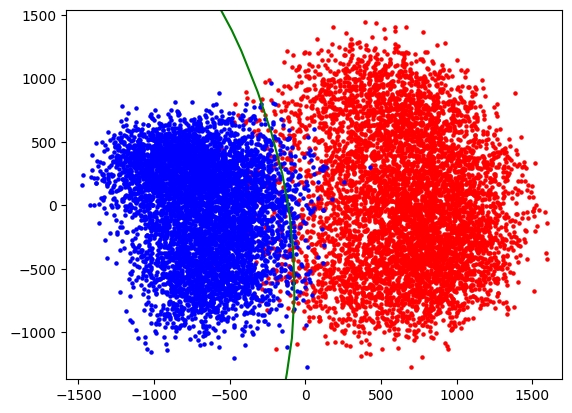

In [15]:
def mmd_decision_boundary(x):

    # decomposition of the dist func
    cov_inv_sub = cov_inv_3 - cov_inv_4
    linear = 2*(np.dot(mean_4.T, cov_inv_4) - np.dot(mean_3.T, cov_inv_3))
    constant = np.dot(np.dot(mean_3.T, cov_inv_3), mean_3) - np.dot(np.dot(mean_4.T, cov_inv_4), mean_4)


    quad = np.dot(np.dot(x.T, cov_inv_sub), x)
    line = np.dot(linear, x)
    dist_func = quad + line + constant

    return dist_func
    #return np.dot(np.dot(x.T, cov_inv_sub), x) + np.dot(linear, x) + constant

tr_3, tr_4 = pca_train[pca_train["y"]==3], pca_train[pca_train["y"]==4]
cls_3_pca_1, cls_3_pca_2 = tr_3.iloc[:,0].to_numpy(), tr_3.iloc[:,1].to_numpy()
cls_4_pca_1, cls_4_pca_2 = tr_4.iloc[:,0].to_numpy(), tr_4.iloc[:,1].to_numpy()
# 画出原始点
plt.scatter(cls_3_pca_1, cls_3_pca_2, color='red', s=5)
plt.scatter(cls_4_pca_1, cls_4_pca_2, color='blue', s=5)

# 画出decision boundary
x = np.linspace(min(min(x1), min(x2)) - 100, max(max(x1), max(x2)) + 100, 10)
y = np.linspace(min(min(y1), min(y2)) - 100, max(max(y1), max(y2)) + 100, 10)
X, Y = np.meshgrid(x, y)

# 计算每个网格点的二次函数值
Z = np.empty(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x_vec = np.array([X[i, j], Y[i, j]])
        Z[i, j] = mmd_decision_boundary(x_vec)

# 绘制决策边界：Z=0的等高线
plt.contour(X, Y, Z, levels=[0], colors='green')

# 设置图表属性以便更好地展示结果
x1, y1 = cls_3_pca_1, cls_3_pca_2
x2, y2 = cls_4_pca_1, cls_4_pca_2
plt.xlim(min(x1, x2) - 100, max(x1, x2) + 100)
plt.ylim(min(y1, y2) - 100, max(y1, y2) + 100)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("MMD Classifier Decision Boundary")

plt.show()

# 2.Accuracy of MED & MMD

In [24]:
def get_accuracy(true_y, predicted_y):
    # 计算正确预测的数量
    correct_predictions = sum(t == p for t, p in zip(true_y, predicted_y))

    # 计算准确率
    accuracy = correct_predictions / len(true_y)
    print(correct_predictions, len(true_y))
    print(f"Accuracy: {accuracy:.8f}")
class_centers, pred = med(pca_train, pca_test)
get_accuracy(y_test, pred)

1953 1992
Accuracy: 0.98042169


In [25]:
pred_mmd = mmd(pca_train, pca_test)
get_accuracy(y_test, pred_mmd)

1955 1992
Accuracy: 0.98142570


# 4.Repeat for 20*1 vec

In [32]:
# def convert_pca_20(df):
#     pca_20 = PCA(n_components=20)
#     pca_result = pca_20.fit_transform(df)
#     col_name = []
#     for i in range(1, 21):
#         col_name.append("PCA"+str(i))
#     pca_df = pd.DataFrame(pca_result, columns=col_name)
#     pca_train = pd.concat([pca_df, y_train], axis=1)
#     return pca_train
# pca_train_20 = convert_pca_20(tr_data)
# pca_train_20


pca_20 = PCA(n_components=20)
pca_result = pca_20.fit_transform(tr_data.iloc[:,1:])
col_name = []
for i in range(1, 21):
    col_name.append("PCA"+str(i))
pca_df = pd.DataFrame(pca_result, columns=col_name)
pca_train_20 = pd.concat([pca_df, y_train], axis=1)
pca_train_20

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,y
0,-547.480299,-437.033207,144.886746,312.098233,-406.626005,-732.238221,171.756171,-126.358509,310.673818,434.428288,...,-108.661497,-40.696253,-197.169887,-215.782011,62.012450,-91.075342,-7.850501,-123.776448,57.851436,4
1,552.342631,751.795643,847.978461,-667.349100,124.932333,-403.890609,294.438854,75.398696,113.063439,387.128145,...,-75.410151,-42.344833,-262.932189,148.246646,-23.045522,87.858964,57.349644,-15.977309,-141.940890,3
2,-860.211153,446.883660,-206.798092,502.982329,296.813560,-365.850788,-27.505746,96.480473,320.015177,493.596647,...,210.835895,-252.183584,208.256582,95.525923,-148.782996,-223.053259,76.610511,63.145358,-11.793925,4
3,1016.061775,576.682283,-349.487281,-188.602271,11.081945,403.499921,304.873899,-93.583722,423.079734,-137.163214,...,52.908137,-111.787080,5.008585,-117.534655,-70.695911,187.965155,-73.257483,-289.953945,-85.948601,3
4,1333.012515,-857.882385,86.982723,281.252441,486.207355,38.671261,-114.850069,60.580018,24.589561,36.276396,...,-60.492508,-110.633889,169.024173,-7.657904,119.651237,249.056362,-177.589551,-77.021137,-227.269392,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11968,118.084960,839.590982,-58.442293,95.581953,-350.549781,-479.565062,-71.673529,-315.819506,326.857699,92.557221,...,-99.945620,-106.158818,225.982491,315.501467,250.584935,297.248500,155.587680,-39.317339,-395.458638,3
11969,-688.864337,274.733577,-523.314519,245.465289,-327.014696,-302.517767,-554.256222,342.629738,-239.925618,6.584812,...,227.116059,75.312775,187.634152,-9.685778,-6.470086,-141.037877,-82.401931,26.836870,-40.621726,4
11970,1012.511575,468.037744,537.995599,-350.327758,40.405403,-581.099124,193.862603,180.899774,-312.800279,288.840726,...,-363.547503,260.603672,97.136632,145.251545,11.270581,-155.181258,-244.504372,126.296145,-159.692829,3
11971,602.674230,634.418307,-71.160846,602.023344,-817.384128,-184.711847,-171.793565,-6.292700,-42.811590,-208.881101,...,-145.176625,-141.056436,-246.190885,-78.188764,4.284971,-70.263195,-204.115761,725.359209,219.960694,3


## MED_20 func & plt

In [33]:
# MED input are both df type
def med_20(train, X_test, dim=20):
    # 计算每个类的中心
    X_test = X_test.to_numpy()
    class_centers = {}
    col_name = []
    for i in range(1, 21):
        col_name.append("PCA"+str(i))
    for cls in [3,4]:
        pca_20_mean_list = []
        for col in col_name:
            cur_mean = train.iloc[:,:dim][train["y"] == cls][col].mean()
            pca_20_mean_list.append(cur_mean)
        class_centers[cls] = np.array(pca_20_mean_list)

    # 对测试数据进行分类
    predictions = []
    for x in X_test:
        distances = {cls: np.linalg.norm(x - center) for cls, center in class_centers.items()}
        predictions.append(min(distances, key=distances.get))
    return class_centers, np.array(predictions)

class_centers_20, pred_20 = med_20(pca_train_20, pca_train_20.iloc[:,:20], dim=20)
#class_centers_20
print("class centers: ", class_centers_20)

class centers:  {3: array([ 6.48650088e+02,  3.34371351e+01,  9.71916143e+00, -3.54043860e+00,
        6.00668298e+00, -4.62845632e+01,  3.46407723e+01,  3.27627211e+01,
        7.18220676e+00, -1.46444434e+01,  5.07300824e-01, -1.57934654e+00,
       -8.76907601e+00, -6.02577356e+00, -5.91254597e+00,  3.78216725e+00,
        3.96522254e+00, -1.85598970e+00,  5.73685642e+00,  8.67133794e-01]), 4: array([-6.80738392e+02, -3.50912487e+01, -1.01999621e+01,  3.71558183e+00,
       -6.30382974e+00,  4.85742309e+01, -3.63544292e+01, -3.43834719e+01,
       -7.53750593e+00,  1.53688946e+01, -5.32396671e-01,  1.65747580e+00,
        9.20287658e+00,  6.32386472e+00,  6.20503584e+00, -3.96926864e+00,
       -4.16137956e+00,  1.94780432e+00, -6.02065503e+00, -9.10030348e-01])}


## MMD_20 func

In [34]:
# train is df
def mmd_20(train, X_test):
    X_test = X_test.to_numpy()
    col_name = []
    for i in range(1, 21):
        col_name.append("PCA"+str(i))
    # all the data are after pca
    cls_3 = train.iloc[:,:20][train["y"] == 3]
    cls_4 = train.iloc[:,:20][train["y"] == 4]
    mean_3 = np.array(cls_3.mean())
    mean_4 = np.array(cls_4.mean())
    cov_inv_3 = np.linalg.inv(cls_3.cov().values)
    cov_inv_4 = np.linalg.inv(cls_4.cov().values)

    # decomposition of the dist func
    cov_inv_sub = cov_inv_3 - cov_inv_4
    linear = 2*(np.dot(mean_4.T, cov_inv_4) - np.dot(mean_3.T, cov_inv_3))
    constant = np.dot(np.dot(mean_3.T, cov_inv_3), mean_3) - np.dot(np.dot(mean_4.T, cov_inv_4), mean_4)
    predictions = []
    for x in X_test:
        quad = np.dot(np.dot(x.T, cov_inv_sub), x)
        line = np.dot(linear, x)
        dist_func = quad + line + constant
        if dist_func < 0:
            predictions.append(3)
        else:
            predictions.append(4)
    return np.array(predictions)
pred_mmd_20 = mmd_20(pca_train_20, pca_train_20.iloc[:,:20])
pred_mmd_20


array([4, 3, 4, ..., 3, 3, 3])

## Accuracy of MED & MMD in 20 by 1 vec

In [35]:
# pca transform X
pca_test_20 = pca_20.transform(X_test)
col_name = []
for i in range(1, 21):
    col_name.append("PCA"+str(i))
pca_test_20 = pd.DataFrame(pca_test_20, columns=col_name)
pca_test_20

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20
0,-789.275430,-437.870143,244.577841,124.060185,-705.471842,-233.060660,563.350522,154.368143,-287.652511,69.030977,139.589553,286.823271,96.038204,257.587704,142.301036,-50.947479,11.611330,2.971566,139.221944,-17.452696
1,-400.728487,-61.622741,-46.176762,-77.526388,122.726391,-475.314219,96.046772,-617.729758,-187.699633,-439.269938,177.765767,140.684913,-404.992807,597.206380,81.011058,-250.388314,-111.561221,-95.740545,-120.368656,-191.836254
2,483.689486,-695.373412,-68.663475,772.351116,590.918371,182.861626,-306.834625,-192.313661,34.714019,-429.927984,556.042257,-104.229971,-286.015913,68.039652,-6.056079,154.518013,-135.576410,50.976257,26.834486,-134.266714
3,-655.878818,-108.021762,-228.684706,-464.914506,-319.675143,16.412828,-106.416345,-374.612477,-230.495071,157.440379,201.776807,-0.341382,-81.550196,-232.033160,-66.732197,112.934681,154.190782,-137.715627,-50.118542,-140.966622
4,-526.303766,-413.751389,-470.073666,-178.640645,-577.020715,-49.781034,68.863681,27.994682,-93.116795,-132.287224,62.319593,140.181361,248.546610,-47.655828,137.781153,38.477446,141.140838,-27.799151,117.277172,-127.868827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,-673.876958,483.629065,-359.459278,190.243121,158.350442,143.931494,-695.513892,528.719429,-123.365935,288.583393,-88.234649,207.495840,196.925555,145.995808,155.584191,-103.889078,-128.499153,-91.441526,228.868434,-16.775690
1988,590.689431,125.258925,-21.252855,-779.602790,121.684762,388.039835,410.810929,267.685923,197.078124,-510.130303,138.082011,521.865208,188.376219,-263.631034,104.550775,-13.425173,224.649367,-279.609003,52.033410,287.048680
1989,-932.387661,408.650261,42.487076,-265.223872,538.607641,-71.982839,287.141129,-440.187252,-318.739083,93.405715,60.442930,-45.593308,-357.383919,-166.672709,-199.808044,53.527262,10.721153,77.749133,41.634186,-108.188639
1990,1292.079850,-252.499527,327.471831,345.216097,-64.380908,358.595760,593.514071,163.422149,52.279053,-325.000432,129.509716,305.553668,119.342941,-134.680104,-266.726484,-418.994556,-136.940125,-47.132163,-10.346546,-304.556198


In [36]:
# MMD
class_centers_20, pred_20_test = med_20(pca_train_20, pca_test_20)

#class_centers_20, pred_20 = med_20(pca_train_20, pca_train_20.iloc[:,:20], dim=20)
get_accuracy(y_test, pred_20_test)
#get_accuracy(y_test, pred_mmd_20)


1959 1992
Accuracy: 0.98343373


In [37]:
pred_mmd_20_test = mmd_20(pca_train_20, pca_test_20)
get_accuracy(y_test, pred_mmd_20_test)

1986 1992
Accuracy: 0.99698795
